<font color='blue'> 
Name: Dnyanai Surkutwar <br>
Email: dsurkutwar@scu.edu  <br>
Student ID: 00001586576 <br><br>
<b>Quiz #1 Problem Statement:</b><br> Training Data size = 90%, Test Data Size = 10% <br>
<li>
1. Build a simple linear model <br>
2. Predict y for a given x = 25 <br>
3. Predict y for a given x = 11 <br>
4. Calculate Mean Absolute Error (MAE) of your model <br>
</li>
</font>    

In [1]:
#Importing all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

##### The dataset showcases the GMC truck pickup listprices in 'X' column and bestprices in 'Y' column.\We will rename these columns to convey meaning.\<br>
df_gmc_truck_prices -> dataframe of the 'X' and 'Y' prices from the dataset

In [2]:
df_gmc_truck_prices = pd.read_csv('gmc_pickup.csv')
df_gmc_truck_prices.rename({'X':'ListPrice','Y':'BestPrice'},\
                           axis=1,inplace='True')
df_gmc_truck_prices.head()

ListPrice  BestPrice
0       12.4       11.2
1       14.3       12.5
2       14.5       12.7
3       14.9       13.1
4       16.1       14.1

##### Performing EDA : 

In [3]:
len(df_gmc_truck_prices)

23

In [4]:
## Using info to get information about the columns like their datatypes
df_gmc_truck_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
ListPrice    23 non-null float64
BestPrice    23 non-null float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [5]:
## Using shape function we get the number of rows and columns in the
## dataframe 
df_gmc_truck_prices.shape

(23, 2)

In [6]:
## describe function is used to understand the statistical details of 
## the dataframe. 
df_gmc_truck_prices.describe()
## For the dataframe, we see that about 50% of listprices are 17$ and
## 15$ for BestPrices 
## Aslo, the max value for listprice is 22.4$ and bestprice in the 
## dataset is 19.6$ 

ListPrice  BestPrice
count  23.000000  23.000000
mean   17.465217  15.300000
std     2.413901   2.057580
min    12.400000  11.200000
25%    15.800000  14.050000
50%    17.299999  15.100000
75%    19.300000  16.849999
max    22.400000  19.600000

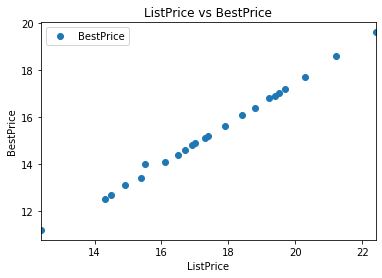

In [18]:
df_gmc_truck_prices.plot(x='ListPrice', y='BestPrice', style='o')  
plt.title('ListPrice vs BestPrice')  
plt.xlabel('ListPrice')  
plt.ylabel('BestPrice')  
plt.show()
## This shows that there are only 1-3 outliers so this is very good data

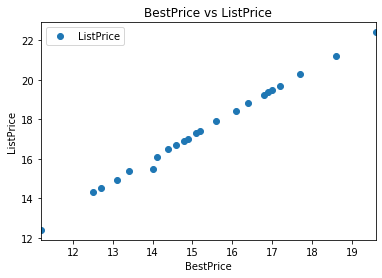

In [9]:
df_gmc_truck_prices.plot(x='BestPrice', y='ListPrice', style='o')  
plt.title('BestPrice vs ListPrice')  
plt.xlabel('BestPrice')  
plt.ylabel('ListPrice')  
plt.show()

In [10]:
## Lets findout the correlation between the data
df_gmc_truck_prices.corr()
## This shows that the ListPrice is directly related to the BestPrice

ListPrice  BestPrice
ListPrice    1.00000    0.99854
BestPrice    0.99854    1.00000

In [11]:
## Here, X is referring to the independent variable of the dataframe
## on which Y, the dependent variable depends.
## Since, we only have two columns we can go ahead and assign X and Y to
## if there are more than 2 columns then X is all columns except the 
## dependent cloumn(Y)
X = df_gmc_truck_prices['ListPrice'].values.reshape(-1,1)
Y = df_gmc_truck_prices['BestPrice'].values.reshape(-1,1)

In [12]:
## Next, we split 90% of the data to the training set while 
## 10% of the data to test set using below code.
## the test_size = 0.1 represents the 10%
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.1, random_state=5)

In [13]:
print('The independent train set is:',X_train.shape)
print('The independent test set is:',X_test.shape)

The independent train set is: (20, 1)
The independent test set is: (3, 1)


In [14]:
print('The dependent train set is:',Y_train.shape)
print('The dependent test set is:',Y_test.shape)

The dependent train set is: (20, 1)
The dependent test set is: (3, 1)


In [15]:
# Build Linear Regression Model
# After splitting the data into training and testing sets, 
# finally, the time is to train our algorithm. For that, 
# we need to import LinearRegression class, instantiate it, 
# and call the fit() method along with our training data.
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# find intercpt and slope
# As we have discussed that the linear regression model 
# basically finds the best value for the intercept and slope, 
# which results in a line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, 
# execute the following code.

#To retrieve the intercept:
print('The regressor intercept:',regressor.intercept_)

#For retrieving the slope:
print('The regressor coefficient:',regressor.coef_)

The regressor intercept: [0.48100825]
The regressor coefficient: [[0.84877307]]


In [17]:
## Predict y for a given x = 25
## Y= coef_+(intercept)X
## Thus...
x = 25
y_for_x25 =  regressor.coef_ + regressor.intercept_*x
y_for_x25

array([[12.87397922]])

In [18]:
# you have to create a DataFrame since the Statsmodels 
# formula interface expects it
X_new25 = pd.DataFrame({'ListPrice': [25]})

# predict for a new observation
Y_new25 = regressor.predict(X_new25)
Y_new25[0]

array([21.7003351])

In [19]:
df_25 = pd.DataFrame({'Actual': list(X_new25.ListPrice.values),\
                   'Predicted': Y_new25[0]})
df_25['Error'] = (df_25.Actual-df_25.Predicted).abs()
df_25
#error25 = X_new - y_for_x25
#error25

Actual  Predicted     Error
0      25  21.700335  3.299665

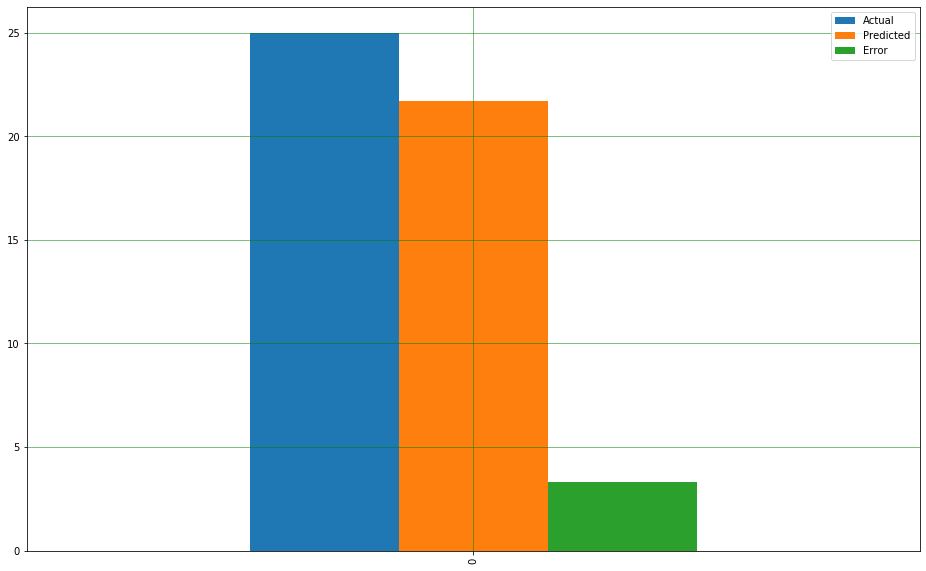

In [34]:
df_25.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
## Predict y for a given x = 11
## Y= coef_+(intercept)X
## Thus...
x = 11
y_for_x11 =  regressor.coef_ + regressor.intercept_*x
y_for_x11

array([[6.13986378]])

In [21]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new11 = pd.DataFrame({'ListPrice': [11]})

# predict for a new observation
Y_new11 = regressor.predict(X_new11)
Y_new11[0]

array([9.81751206])

In [22]:
df_11 = pd.DataFrame({'Actual': list(X_new11.ListPrice.values),\
                   'Predicted': Y_new11[0]})
df_11['Error'] = (df_11.Actual-df_11.Predicted).abs()
df_11

Actual  Predicted     Error
0      11   9.817512  1.182488

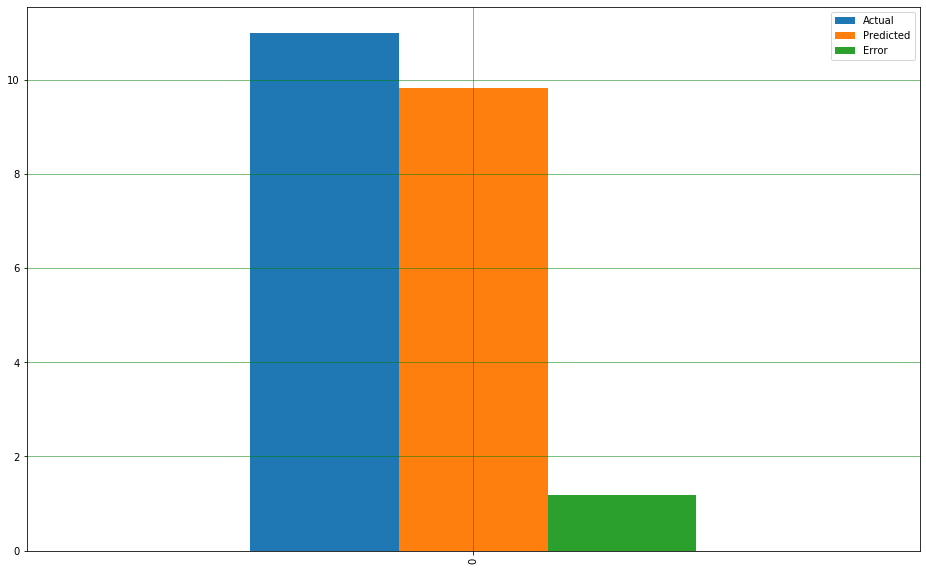

In [35]:
df_11.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
Y_pred = regressor.predict(X_test)

In [24]:
# Now compare the actual output values for X_test 
# with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': Y_test.flatten(),\
                   'Predicted': Y_pred.flatten()})
df

Actual  Predicted
0  15.200000  15.249659
1  12.700000  12.788218
2  16.799999  16.777452

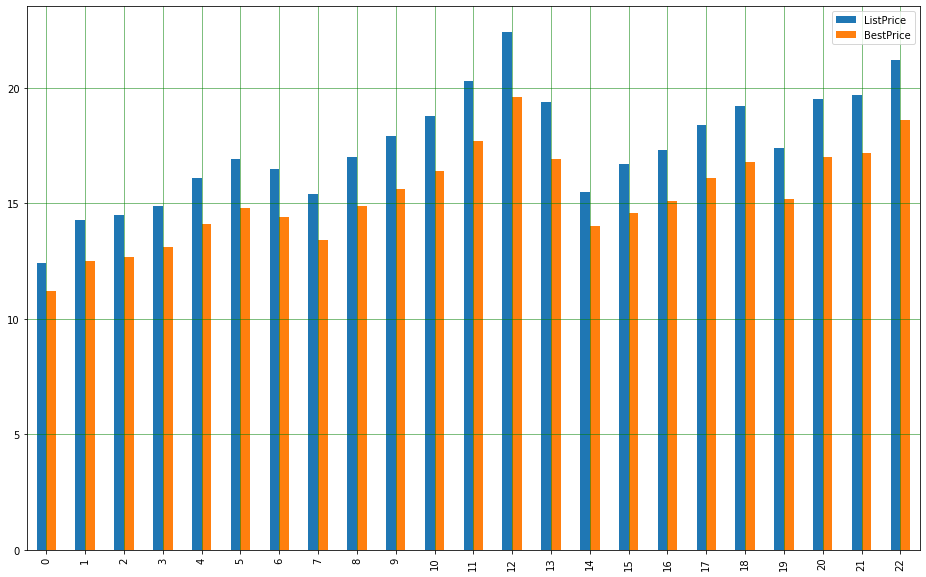

In [37]:
# Visualize Comparison:
# We can also visualize comparison result as a bar graph 
# using the below script :
# Note: As the number of records is huge, for representation 
# purpose I’m taking just 25 records.
#df1 = df_gmc_truck_prices.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

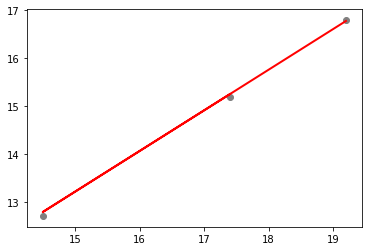

In [26]:
# Though our model is not very precise, 
# the predicted percentages are close to the actual ones.
# Let's plot our straight line with the test data :
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [27]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 0.053474980482127066


In [ ]:
## Almost perfect linear regression model. 
